In [61]:
#read merged investors_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
from scipy.stats import pearsonr

df = pd.read_csv("Combined_09_12_24.csv")


from matplotlib.colors import LinearSegmentedColormap
sunset_orange_blue = LinearSegmentedColormap.from_list(
    "sunset_orange_blue",
    ["#F26B38", "#F7C99E", "#0067A3"],  # orange → sand → blue
)



Section 1: Demographics & Financial Confidence
This section explores how financial confidence and knowledge differ across demographic factors such as age, gender, and education. 
The goal is to identify whether confidence and knowledge grow with experience and education, and whether any persistent gender gap exists.

    S1-Q1:(Individual)How does financial confidence vary across age and gender?
    S1-Q2:(Individual wtih Regional)How does financial confidence differ across regions when considering age and gender?
    S1-Q3:(Edcuation)How does education level influence financial knowledge?
    S1-Q4:(Income)Does higher income mean higher financial knowledge?
    S1-Q5:(Integrative)How aligned are people’s financial confidence and financial knowledge across demographic groups?

Section 2: Behavioral & Financial Outcomes
This section investigates how individuals’ financial knowledge and confidence translate into their real-world financial behaviors and outcomes.
The focus shifts from what people know to what people do, exploring whether financially knowledgeable or confident individuals make more responsible financial decisions.
The goal is to reveal how literacy and confidence shape tangible financial outcomes and long-term stability.

    S2-Q1:(Saving & Spending)How does financial confidence relate to saving and spending behavior?
    S2-Q2:(Debt & Credit)How does financial knowledge influence responsible debt management and credit behavior?
    S2-Q3:(Investment Behavior)Are financially knowledgeable individuals more likely to invest in stocks or retirement accounts?
    S2-Q4:(Emergency Preparedness)Does higher financial confidence mean better financial resilience?
    S2-Q5:(Integrative Outcome)How well do individuals’ financial behaviors align with their knowledge and confidence levels across demographic groups?

Section 3: Regional & Temporal Trends
This section The objective is to uncover geographic inequalities in financial literacy, identify regional leaders and laggards, and track how these patterns have shifted between survey yearsexamines how financial knowledge and confidence vary across regions and evolve over time. This section highlights where financial education and support initiatives may be most needed.

    S3-Q1:(Geographic Overview)Which states have the highest and lowest levels of financial knowledge?
    S3-Q2:(Extreme Comparison)Which states show the largest gap between “very high” and “very low” financial knowledge groups?
    S3-Q3:(Temporal Evolution)How has financial knowledge changed across regions over time
    S3-Q4:(Confidence vs. Reality)Do regions with higher financial confidence also demonstrate higher actual knowledge?
    S3-Q5:(Comprehensive Regional Profile)Which regions demonstrate the strongest overall financial health—combining confidence, knowledge, savings, credit, and emergency preparedness?

S1-Q1:(Individua)How does financial confidence vary across age and gender?

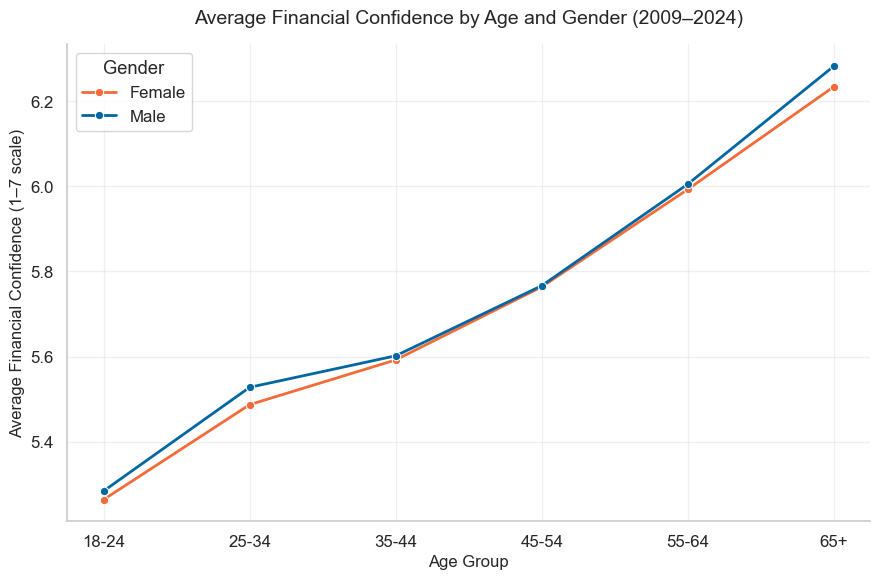

In [ ]:
# --- Step 1: Clean and normalize confidence column ---
# Map qualitative confidence to numeric scale (1–7)
confidence_map = {
    "Strongly disagree": 1,
    "Moderately disagree": 2,
    "Slightly disagree": 3,
    "Neither agree nor disagree": 4,
    "Slightly agree": 5,
    "Moderately agree": 6,
    "Strongly agree": 7
}
df["Financial Confidence (num)"] = df["Financial Confidence"].map(confidence_map)

# Drop missing values for relevant columns
conf_df = df.dropna(subset=["Age Group", "Gender", "Financial Confidence (num)"])

# --- Step 2: Compute mean and standard error for confidence by Age × Gender ---
summary = (
    conf_df.groupby(["Age Group", "Gender"])["Financial Confidence (num)"]
    .agg(["mean", "sem"])
    .reset_index()
)

# --- Step 3: Sort Age Group in logical order ---
age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
summary["Age Group"] = pd.Categorical(summary["Age Group"], categories=age_order, ordered=True)
summary = summary.sort_values("Age Group")

# --- Step 4: Plot line chart with error bars ---
plt.figure(figsize=(9, 6))

# Define custom orange-blue palette (warm vs cool)
gender_palette = {
    "Female": "#F26B38",  # bright orange
    "Male": "#0067A3"     # deep blue
}

sns.lineplot(
    data=summary,
    x="Age Group",
    y="mean",
    hue="Gender",
    palette=gender_palette,
    marker="o",
    linewidth=2,
    err_style="bars",
)

# --- Step 5: Customize chart aesthetics ---
plt.title("Average Financial Confidence by Age and Gender (2009–2024)", fontsize=14, pad=15)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Financial Confidence (1–7 scale)", fontsize=12)
plt.legend(title="Gender", loc="upper left")
plt.grid(alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()


S1-Q2:(Regional + Individual)How does financial confidence differ across regions when considering age and gender?

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/2993302920.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/2993302920.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/2993302920.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

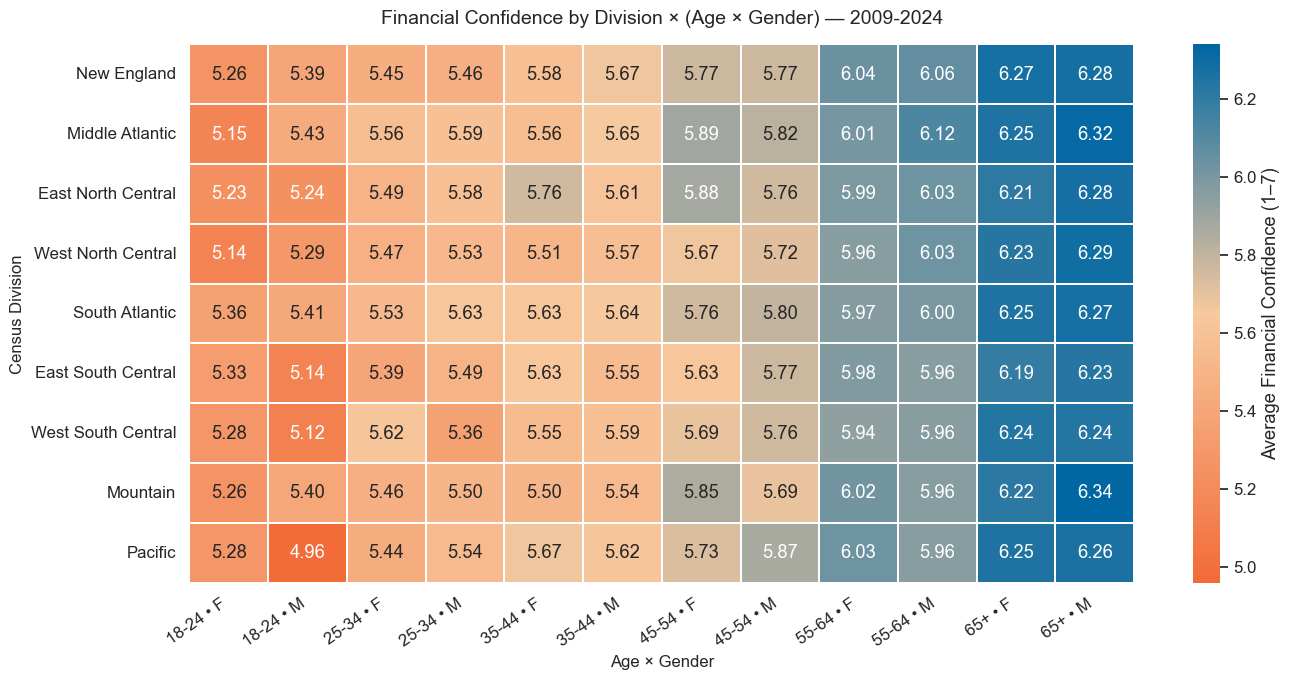

In [36]:
# --- Step 1: Clean and normalize confidence column ---
# Map qualitative confidence responses to numeric scale (1–7)
confidence_map = {
    "Strongly disagree": 1,
    "Moderately disagree": 2,
    "Slightly disagree": 3,
    "Neither agree nor disagree": 4,
    "Slightly agree": 5,
    "Moderately agree": 6,
    "Strongly agree": 7
}
df["Financial Confidence (num)"] = df["Financial Confidence"].map(confidence_map)

# Drop missing values for relevant columns
conf_region = df.dropna(subset=["Census Division", "Age Group", "Gender", "Financial Confidence (num)"])

# --- Step 2: Prepare ordered categories for plotting ---
age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
div_order = [
    "New England",
    "Middle Atlantic",
    "East North Central",
    "West North Central",
    "South Atlantic",
    "East South Central",
    "West South Central",
    "Mountain",
    "Pacific"
]
gender_order = ["Female", "Male"]

conf_region["Age Group"] = pd.Categorical(conf_region["Age Group"], categories=age_order, ordered=True)
conf_region["Census Division"] = pd.Categorical(conf_region["Census Division"], categories=div_order, ordered=True)
conf_region["Gender"] = pd.Categorical(conf_region["Gender"], categories=gender_order, ordered=True)

# Combine age and gender into one column (use str.cat to avoid categorical + string error)
short_gender = conf_region["Gender"].map({"Female": "F", "Male": "M"})
conf_region["Age × Gender"] = (
    conf_region["Age Group"].astype("string").str.cat(short_gender.astype("string"), sep=" • ")
)

# --- Step 3: Compute mean financial confidence by Division × (Age × Gender) ---
heat_df = (
    conf_region.groupby(["Census Division", "Age × Gender"])["Financial Confidence (num)"]
    .mean()
    .round(2)
    .reset_index()
)

# Arrange columns in logical order
age_gender_cols = []
for a in age_order:
    for g in ["F", "M"]:
        age_gender_cols.append(f"{a} • {g}")

heat = (
    heat_df.pivot(index="Census Division", columns="Age × Gender", values="Financial Confidence (num)")
    .reindex(index=div_order, columns=age_gender_cols)
)

# --- Step 4: Plot heatmap ---
plt.figure(figsize=(14, 7))
sns.heatmap(
    heat,
    cmap=sunset_orange_blue,
    annot=True,
    fmt=".2f",
    linewidths=0.3,
    cbar_kws={"label": "Average Financial Confidence (1–7)"}
)

# --- Step 5: Customize chart aesthetics ---
plt.title("Financial Confidence by Division × (Age × Gender) — 2009-2024", fontsize=14, pad=15)
plt.xlabel("Age × Gender", fontsize=12)
plt.ylabel("Census Division", fontsize=12)
plt.xticks(rotation=35, ha="right")
plt.yticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


S1-Q3:(Edcuation)How does education level influence financial knowledge?

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/2920608084.py:41: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



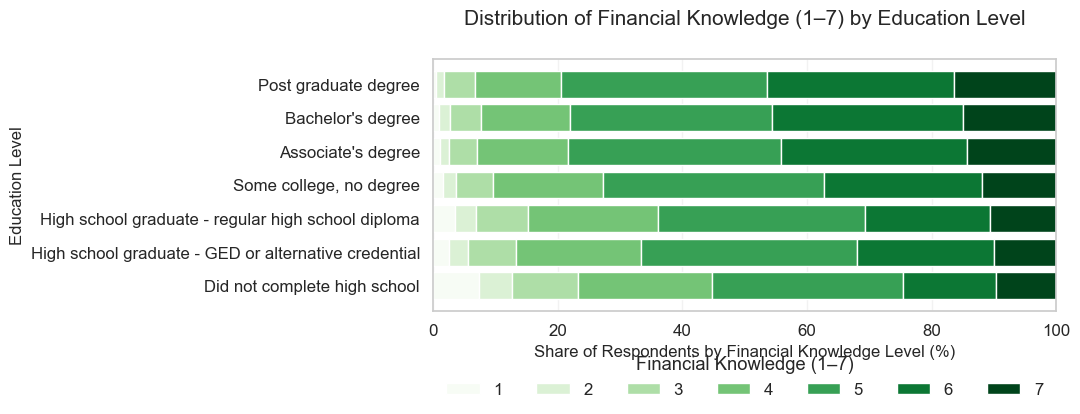

In [58]:
# --- Step 1: Clean and normalize knowledge column ---
kn_df = df.copy()
kn_df["Financial Knowledge (num)"] = pd.to_numeric(kn_df["Financial Knowledge"], errors="coerce")
kn_df["Education"] = kn_df["Education"].astype(str).str.strip()

drop_edu = {"Prefer not to say", "Don't know", "Unknown", "NA"}
kn_df = kn_df[~kn_df["Education"].isin(drop_edu)]
kn_df = kn_df.dropna(subset=["Education", "Financial Knowledge (num)"])

# --- Step 2: Build percentage distribution by knowledge level within each education group ---
desired_edu_order = [
    "Did not complete high school",
    "High school graduate - GED or alternative credential",
    "High school graduate - regular high school diploma",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Post graduate degree"
]
present = [e for e in desired_edu_order if e in kn_df["Education"].unique()]
remaining = sorted(set(kn_df["Education"].unique()) - set(present))
edu_order = present + remaining
knowledge_order = [1, 2, 3, 4, 5, 6, 7]

ct = (
    kn_df.pivot_table(
        index="Education",
        columns="Financial Knowledge (num)",
        values="State",
        aggfunc="count",
        fill_value=0,
    )
    .reindex(index=edu_order)
    .reindex(columns=knowledge_order, fill_value=0)
)
dist_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)

# --- Step 3: Plot stacked bar chart ---
plt.figure(figsize=(11, max(5, 0.5 * len(dist_pct))))
bottom = [0] * len(dist_pct)
colors = plt.cm.get_cmap("Greens",len(knowledge_order))

for i, k in enumerate(knowledge_order):
    vals = dist_pct[k].values
    plt.barh(dist_pct.index, vals, left=bottom, label=f"{k}", color=colors(i))
    bottom = [a + b for a, b in zip(bottom, vals)]

# --- Step 4: Customize chart aesthetics ---
plt.title("Distribution of Financial Knowledge (1–7) by Education Level", fontsize=15, pad=25)
plt.xlabel("Share of Respondents by Financial Knowledge Level (%)", fontsize=12)
plt.ylabel("Education Level", fontsize=12)

# Move legend to bottom outside the plot
plt.legend(
    title="Financial Knowledge (1–7)",
    ncol=7,
    bbox_to_anchor=(0.5, -0.12),
    loc="upper center",
    frameon=False
)

plt.xlim(0, 100)
plt.grid(axis="x", alpha=0.25)

# Give extra top and bottom margins
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()



S1-Q4:(Income)Does higher income mean higher financial knowledge?

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/3126615883.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inc_df.groupby("Annual Income")["Financial Knowledge (num)"]


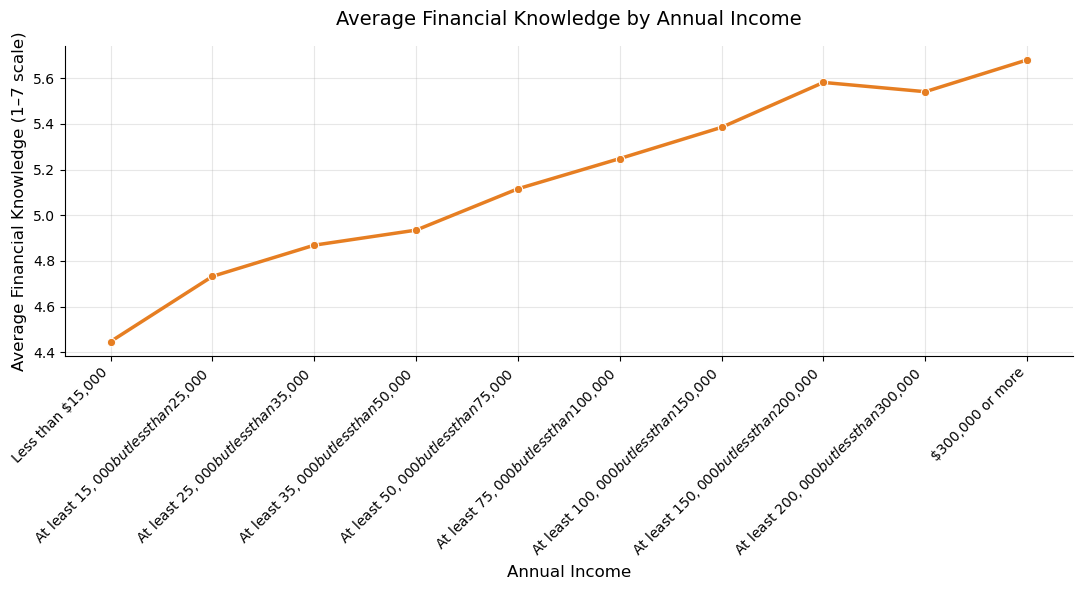

In [5]:
# --- Step 1: Clean and prepare data ---
inc_df = df.copy()
inc_df["Financial Knowledge (num)"] = pd.to_numeric(inc_df["Financial Knowledge"], errors="coerce")
inc_df["Annual Income"] = inc_df["Annual Income"].astype(str).str.strip()

drop_inc = {"Prefer not to say", "Don't know", "NA", "Unknown"}
inc_df = inc_df[~inc_df["Annual Income"].isin(drop_inc)]
inc_df = inc_df.dropna(subset=["Annual Income", "Financial Knowledge (num)"])

# --- Step 2: Define income order ---
income_order = [
    "Less than $15,000",
    "At least $15,000 but less than $25,000",
    "At least $25,000 but less than $35,000",
    "At least $35,000 but less than $50,000",
    "At least $50,000 but less than $75,000",
    "At least $75,000 but less than $100,000",
    "At least $100,000 but less than $150,000",
    "At least $150,000 but less than $200,000",
    "At least $200,000 but less than $300,000",
    "$300,000 or more"
]
inc_df["Annual Income"] = pd.Categorical(inc_df["Annual Income"], categories=income_order, ordered=True)

# --- Step 3: Compute average and error bars ---
summary = (
    inc_df.groupby("Annual Income")["Financial Knowledge (num)"]
    .agg(["mean", "sem"])
    .reset_index()
    .dropna()
)

# --- Step 4: Plot line chart ---
plt.figure(figsize=(11, 6))
sns.lineplot(
    data=summary,
    x="Annual Income",
    y="mean",
    marker="o",
    linewidth=2.5,
    color="#E67E22",
    err_style="bars"
)

# --- Step 5: Customize chart aesthetics ---
plt.title("Average Financial Knowledge by Annual Income", fontsize=14, pad=15)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Average Financial Knowledge (1–7 scale)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


S1-Q5:(Integrative)How aligned are people’s financial confidence and financial knowledge across demographic groups?

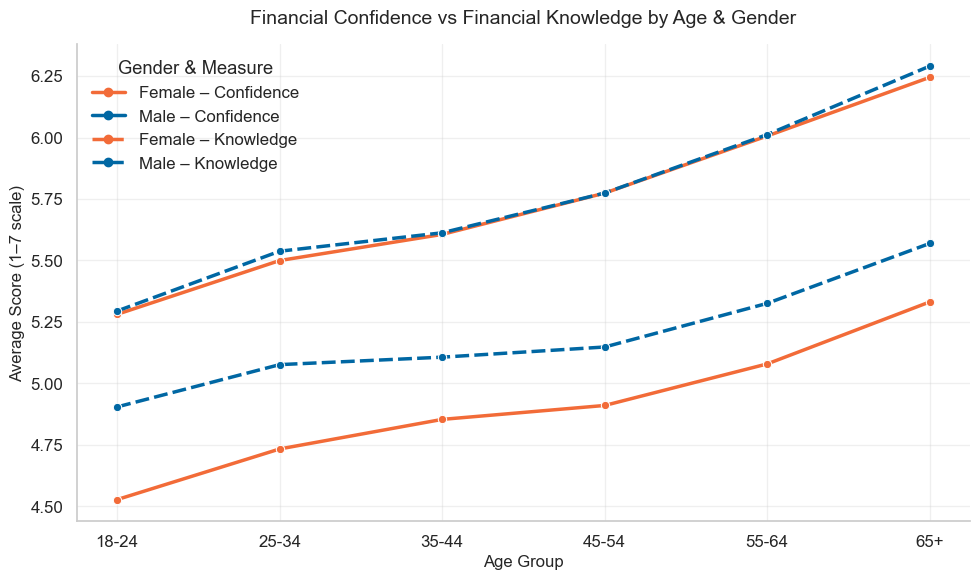

In [44]:
# --- Step 1: Clean and prepare data ---
align_df = df.copy()

# Convert qualitative to numeric (1–7)
confidence_map = {
    "Strongly disagree": 1, "Moderately disagree": 2, "Slightly disagree": 3,
    "Neither agree nor disagree": 4, "Slightly agree": 5,
    "Moderately agree": 6, "Strongly agree": 7
}
align_df["Financial Confidence (num)"] = align_df["Financial Confidence"].map(confidence_map)
align_df["Financial Knowledge (num)"] = pd.to_numeric(align_df["Financial Knowledge"], errors="coerce")

# Drop missing values
align_df = align_df.dropna(subset=["Financial Confidence (num)", "Financial Knowledge (num)", "Age Group", "Gender"])

# --- Step 2: Compute average confidence and knowledge by Age × Gender ---
summary = (
    align_df.groupby(["Age Group", "Gender"])
    [["Financial Confidence (num)", "Financial Knowledge (num)"]]
    .mean()
    .reset_index()
)

# --- Step 3: Sort Age Group logically ---
age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
summary["Age Group"] = pd.Categorical(summary["Age Group"], categories=age_order, ordered=True)
summary = summary.sort_values("Age Group")

# --- Step 4: Plot dual-line chart (Confidence vs Knowledge) ---
plt.figure(figsize=(10, 6))

# Define consistent colors
female_color = "#F26B38"   # orange
male_color = "#0067A3"     # blue

# --- Confidence line (solid) ---
sns.lineplot(
    data=summary,
    x="Age Group", y="Financial Confidence (num)",
    hue="Gender", style="Gender", marker="o", linewidth=2.5,
    palette={"Female": female_color, "Male": male_color}
)

# --- Knowledge line (dashed) ---
sns.lineplot(
    data=summary,
    x="Age Group", y="Financial Knowledge (num)",
    hue="Gender", style="Gender", marker="o", linewidth=2.5,
    linestyle="--", legend=False,
    palette={"Female": female_color, "Male": male_color}
)

# --- Step 5: Customize aesthetics ---
plt.title("Financial Confidence vs Financial Knowledge by Age & Gender", fontsize=14, pad=15)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Score (1–7 scale)", fontsize=12)

# Custom legend (color + measure)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=female_color, lw=2.5, linestyle="-", marker="o", label="Female – Confidence"),
    Line2D([0], [0], color=male_color, lw=2.5, linestyle="-", marker="o", label="Male – Confidence"),
    Line2D([0], [0], color=female_color, lw=2.5, linestyle="--", marker="o", label="Female – Knowledge"),
    Line2D([0], [0], color=male_color, lw=2.5, linestyle="--", marker="o", label="Male – Knowledge"),
]

plt.legend(handles=legend_elements, title="Gender & Measure", loc="upper left", frameon=False)

plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()




S2-Q1:(Saving & Spending)How does financial confidence relate to saving and spending behavior?

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/2449342772.py:65: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0.




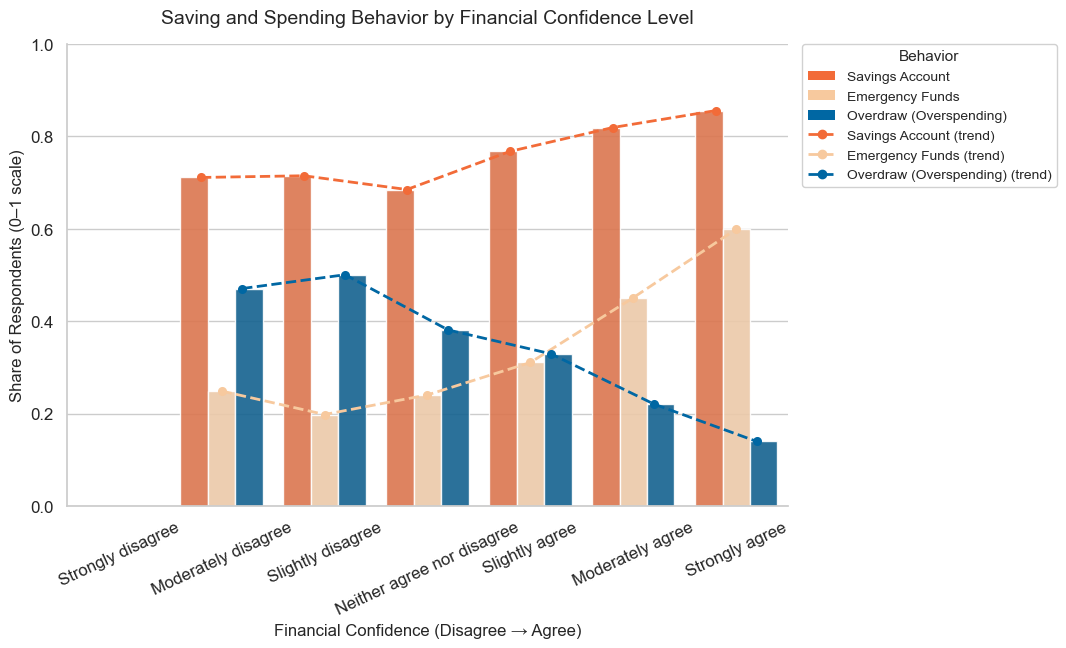

In [45]:
# --- Step 1: Prepare clean subset (use original Likert labels on X) ---
save_df = df.dropna(subset=["Financial Confidence",
                            "Savings Account", "Emergency Funds", "Overdraw"]).copy()

# --- Step 2: Normalize binary behavior columns to 0/1 safely ---
for col in ["Savings Account", "Emergency Funds", "Overdraw"]:
    save_df[col] = (
        save_df[col]
          .replace({"Yes": 1, "No": 0, "Y": 1, "N": 0})
          .where(save_df[col].isin(["Yes", "No", "Y", "N", 1, 0]))
    )
save_df = save_df.dropna(subset=["Savings Account", "Emergency Funds", "Overdraw"]).copy()

# --- Step 3: Set Likert order for the X axis (Disagree → Agree) ---
conf_order = [
    "Strongly disagree", "Moderately disagree", "Slightly disagree",
    "Neither agree nor disagree", "Slightly agree", "Moderately agree", "Strongly agree"
]
save_df["Financial Confidence"] = pd.Categorical(save_df["Financial Confidence"],
                                                 categories=conf_order, ordered=True)

# --- Step 4: Aggregate mean shares by confidence level ---
save_summary = (
    save_df.groupby("Financial Confidence", observed=False)[
        ["Savings Account", "Emergency Funds", "Overdraw"]
    ].mean().reindex(conf_order).reset_index()
)

# --- Step 5: Long-form for plotting + aesthetics ---
behavior_bars = ["Savings Account", "Emergency Funds", "Overdraw"]
color_map = {
    "Savings Account": "#F26B38",   
    "Emergency Funds": "#F7C99E",   
    "Overdraw (Overspending)": "#0067A3" 
}

long_df = save_summary.melt(
    id_vars="Financial Confidence",
    value_vars=behavior_bars,
    var_name="Behavior",
    value_name="Share"
)
# Rename for clearer legend label
long_df["Behavior"] = long_df["Behavior"].replace({"Overdraw": "Overdraw (Overspending)"})
behavior_order_disp = ["Savings Account", "Emergency Funds", "Overdraw (Overspending)"]

# --- Step 6: Plot grouped bars (no auto legend) ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(11, 6))

sns.barplot(
    data=long_df,
    x="Financial Confidence",
    y="Share",
    hue="Behavior",
    hue_order=behavior_order_disp,
    palette=color_map,
    alpha=0.9,
    dodge=True,
    legend=False,
    ax=ax
)

# --- Step 7: Add trend lines aligned to bars (pointplot with dodge, no legend) ---
sns.pointplot(
    data=long_df,
    x="Financial Confidence",
    y="Share",
    hue="Behavior",
    hue_order=behavior_order_disp,
    palette=color_map,
    dodge=0.4,
    join=True,
    markers="o",
    linestyles="--",
    errorbar=None,
    linewidth=2,
    legend=False,
    zorder=5,
    ax=ax
)

# --- Step 8: Fixed legend OUTSIDE on the right ---
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

handles = [
    Patch(facecolor=color_map["Savings Account"], edgecolor="none", label="Savings Account"),
    Patch(facecolor=color_map["Emergency Funds"], edgecolor="none", label="Emergency Funds"),
    Patch(facecolor=color_map["Overdraw (Overspending)"], edgecolor="none", label="Overdraw (Overspending)"),
    Line2D([0],[0], color=color_map["Savings Account"], lw=2, linestyle="--", marker="o", label="Savings Account (trend)"),
    Line2D([0],[0], color=color_map["Emergency Funds"], lw=2, linestyle="--", marker="o", label="Emergency Funds (trend)"),
    Line2D([0],[0], color=color_map["Overdraw (Overspending)"], lw=2, linestyle="--", marker="o",
           label="Overdraw (Overspending) (trend)")
]
ax.legend(
    handles=handles, title="Behavior",
    loc="upper left", bbox_to_anchor=(1.02, 1.00),  # outside right
    borderaxespad=0., frameon=True, facecolor="white", framealpha=0.9,
    fontsize=10, title_fontsize=11, ncol=1
)
fig.subplots_adjust(right=0.78)  # leave room for legend

# --- Step 9: Final polish ---
ax.set_title("Saving and Spending Behavior by Financial Confidence Level", fontsize=14, pad=15)
ax.set_xlabel("Financial Confidence (Disagree → Agree)", fontsize=12)
ax.set_ylabel("Share of Respondents (0–1 scale)", fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis="x", rotation=25)
sns.despine()
plt.show()


S2-Q2:(Debt & Credit)How does financial knowledge influence responsible debt management and credit behavior?

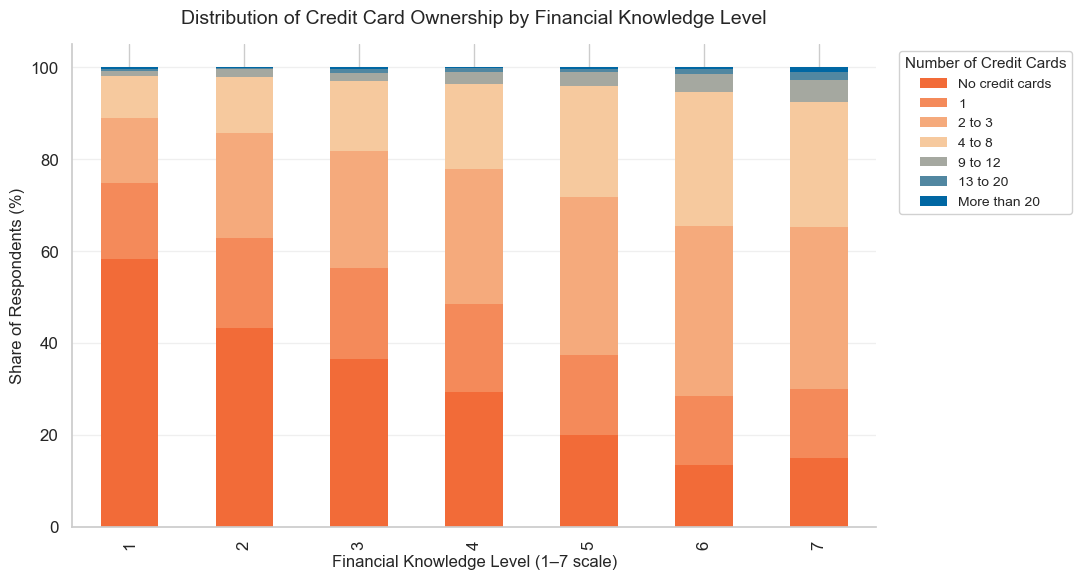

In [60]:
# --- Step 1: Clean & keep needed columns ---
use_cols = ["Financial Knowledge", "Number of Credit Cards"]
credit_df = df[use_cols].copy()

# Financial Knowledge -> numeric 1–7
credit_df["Financial Knowledge (num)"] = pd.to_numeric(
    credit_df["Financial Knowledge"], errors="coerce"
)
credit_df = credit_df.dropna(subset=["Financial Knowledge (num)", "Number of Credit Cards"]).copy()

# Order categories for credit-card count (bins are categorical, not numeric)
card_order = [
    "No credit cards",
    "1",
    "2 to 3",
    "4 to 8",
    "9 to 12",
    "13 to 20",
    "More than 20",
]
credit_df = credit_df[credit_df["Number of Credit Cards"].isin(card_order)].copy()
credit_df["Number of Credit Cards"] = pd.Categorical(
    credit_df["Number of Credit Cards"], categories=card_order, ordered=True
)

# Knowledge order
kn_order = [1, 2, 3, 4, 5, 6, 7]
credit_df["Financial Knowledge (num)"] = pd.Categorical(
    credit_df["Financial Knowledge (num)"], categories=kn_order, ordered=True
)

# --- Step 2: Crosstab and row-normalize to percentage ---
ct = pd.crosstab(
    credit_df["Financial Knowledge (num)"],
    credit_df["Number of Credit Cards"]
).reindex(index=kn_order, columns=card_order)

pct = ct.div(ct.sum(axis=1), axis=0) * 100  # row-wise percentages

# --- Step 3: Plot stacked bar chart ---
fig, ax = plt.subplots(figsize=(11, 6))
pct.plot(
    kind="bar",
    stacked=True,
    colormap=sunset_orange_blue,
    edgecolor="none",
    ax=ax
)

ax.set_title("Distribution of Credit Card Ownership by Financial Knowledge Level", fontsize=14, pad=15)
ax.set_xlabel("Financial Knowledge Level (1–7 scale)", fontsize=12)
ax.set_ylabel("Share of Respondents (%)", fontsize=12)
ax.grid(axis="y", alpha=0.3)
sns.despine(ax=ax)

# Legend outside on the right
ax.legend(
    title="Number of Credit Cards",
    bbox_to_anchor=(1.02, 1.00),
    loc="upper left",
    frameon=True, facecolor="white", framealpha=0.9,
    fontsize=10, title_fontsize=11
)
fig.subplots_adjust(right=0.78)

plt.tight_layout()
plt.show()


S2-Q3:(Investment Behavior)Are financially knowledgeable individuals more likely to invest in stocks or retirement accounts?

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/389745835.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/389745835.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



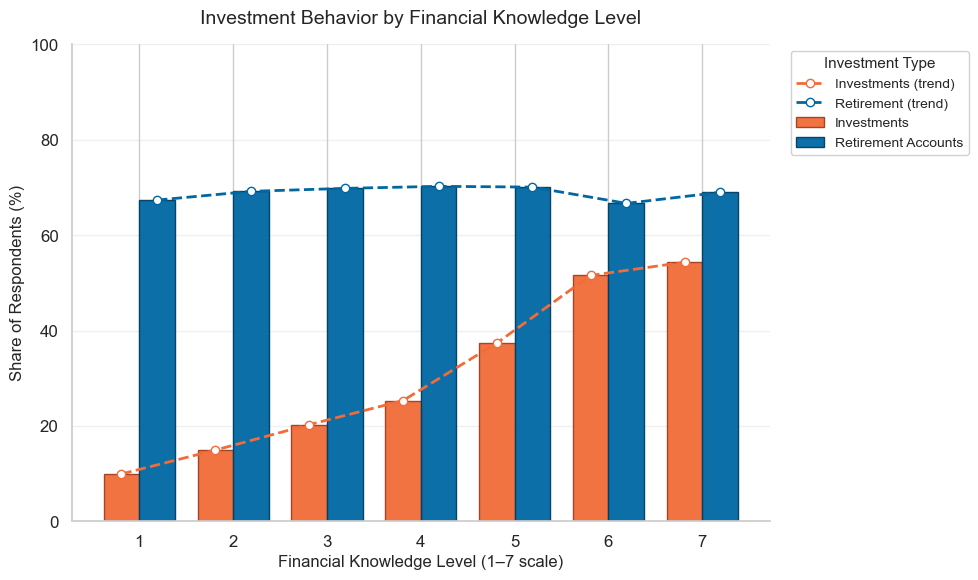

In [62]:
# --- Step 1: Clean and normalize knowledge & investment columns ---
df["Financial Knowledge (num)"] = pd.to_numeric(df["Financial Knowledge"], errors="coerce")

binary_map = {"Yes": 1, "No": 0, "Y": 1, "N": 0, 1: 1, 0: 0}
for col in ["Other Investments", "Other Retirement Accounts"]:
    s = df[col]
    s = s.where(s.isin(list(binary_map.keys())))
    s = s.replace(binary_map).astype("float")
    df[col + " (bin)"] = s

invest_cols = ["Financial Knowledge (num)", "Other Investments (bin)", "Other Retirement Accounts (bin)"]
invest_df = df[invest_cols].dropna(subset=["Financial Knowledge (num)"]).copy()

# --- Step 2: Aggregate mean participation by knowledge level (→ %) ---
kn_order = [1, 2, 3, 4, 5, 6, 7]
invest_df["Financial Knowledge (num)"] = pd.Categorical(
    invest_df["Financial Knowledge (num)"], categories=kn_order, ordered=True
)

summary = (
    invest_df.groupby("Financial Knowledge (num)", observed=False)
    .agg({
        "Other Investments (bin)": "mean",
        "Other Retirement Accounts (bin)": "mean"
    })
    .reindex(kn_order)
    .reset_index()
)

# to percent
summary["Investments %"] = summary["Other Investments (bin)"] * 100
summary["Retirement %"]  = summary["Other Retirement Accounts (bin)"] * 100

# --- Step 3: Prepare aligned x positions for bars and trend lines ---
x_centers = list(range(len(kn_order)))   # 0..6 for knowledge levels 1..7
bar_width = 0.38

x_left  = [x - bar_width/2 for x in x_centers]  # positions for Investments
x_right = [x + bar_width/2 for x in x_centers]  # positions for Retirement

# --- Step 4: Plot grouped bars and perfectly aligned dashed trend lines ---
plt.figure(figsize=(10, 6))

# Bars
bars1 = plt.bar(
    x_left, summary["Investments %"], width=bar_width,
    color="#F26B38", alpha=0.95, edgecolor="#A13E1F", label="Investments"
)
bars2 = plt.bar(
    x_right, summary["Retirement %"], width=bar_width,
    color="#0067A3", alpha=0.95, edgecolor="#003E60", label="Retirement Accounts"
)

# Trend lines (aligned to bar centers of each series)
plt.plot(
    x_left, summary["Investments %"],
    color="#F26B38", linestyle="--", linewidth=2, marker="o",
    markerfacecolor="white", markeredgecolor="#F26B38",
    label="Investments (trend)"
)
plt.plot(
    x_right, summary["Retirement %"],
    color="#0067A3", linestyle="--", linewidth=2, marker="o",
    markerfacecolor="white", markeredgecolor="#0067A3",
    label="Retirement (trend)"
)

# --- Step 5: Axes, ticks, legend, and aesthetics ---
plt.title("Investment Behavior by Financial Knowledge Level", fontsize=14, pad=15)
plt.ylabel("Share of Respondents (%)", fontsize=12)
plt.xlabel("Financial Knowledge Level (1–7 scale)", fontsize=12)
plt.xticks(ticks=x_centers, labels=kn_order)
plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.3)
sns.despine()

plt.legend(
    title="Investment Type",
    bbox_to_anchor=(1.02, 1.0),
    loc="upper left",
    frameon=True,
    facecolor="white",
    framealpha=0.9,
    fontsize=10,
    title_fontsize=11
)
plt.tight_layout()
plt.show()



S2-Q4:(Emergency Preparedness)Does higher financial confidence mean better financial resilience?

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/3757941660.py:21: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/3757941660.py:21: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



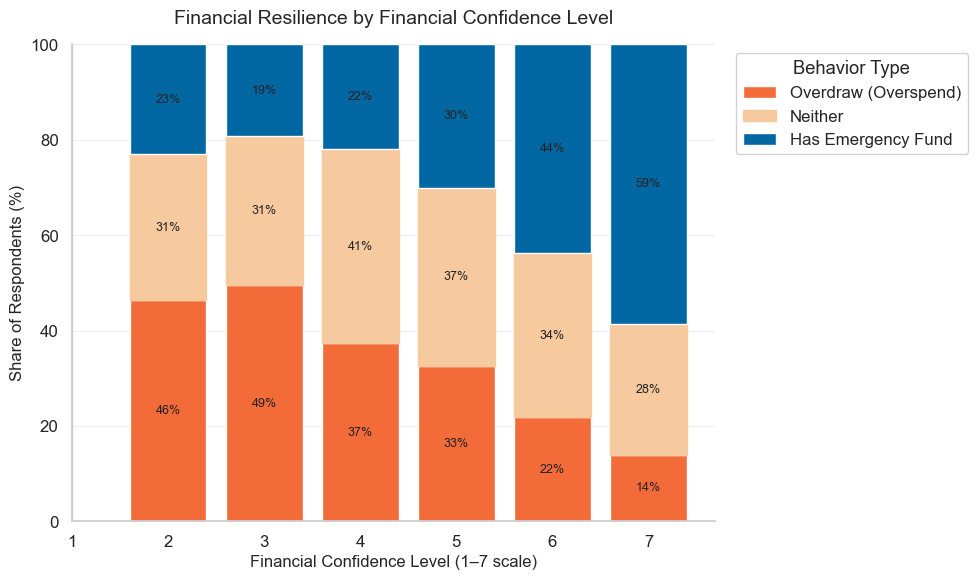

In [64]:
# --- Step 1: Prepare columns (map confidence to 1–7) ---
confidence_map = {
    "Strongly disagree": 1,
    "Moderately disagree": 2,
    "Slightly disagree": 3,
    "Neither agree nor disagree": 4,
    "Slightly agree": 5,
    "Moderately agree": 6,
    "Strongly agree": 7
}
df["Financial Confidence (num)"] = df["Financial Confidence"].map(confidence_map)

cols = ["Financial Confidence (num)", "Emergency Funds", "Overdraw"]
res_df = df[cols].dropna(subset=["Financial Confidence (num)"]).copy()

# Keep only clean Yes/No tokens to avoid strings like "Prefer not to say"
binary_map = {"Yes": 1, "No": 0, "Y": 1, "N": 0, 1: 1, 0: 0}
for col in ["Emergency Funds", "Overdraw"]:
    s = res_df[col]
    s = s.where(s.isin(list(binary_map.keys())))      # unknowns -> NaN
    s = s.replace(binary_map).astype("float")
    res_df[col] = s

# --- Step 2: Calculate % shares by confidence level ---
# enforce x order 1..7
order = [1, 2, 3, 4, 5, 6, 7]
res_df["Financial Confidence (num)"] = pd.Categorical(
    res_df["Financial Confidence (num)"], categories=order, ordered=True
)

summary = (
    res_df.groupby("Financial Confidence (num)", observed=False)
          .agg({"Emergency Funds": "mean", "Overdraw": "mean"})
          .reindex(order)
          .reset_index()
)

summary["Emergency Funds %"] = summary["Emergency Funds"] * 100
summary["Overdraw %"]        = summary["Overdraw"]        * 100
summary["Neither %"]         = 100 - (summary["Emergency Funds %"] + summary["Overdraw %"])

# --- Step 3: Stacked bar chart with percentage labels ---
plt.figure(figsize=(10, 6))

x = summary["Financial Confidence (num)"].astype(int)

bar1 = plt.bar(x, summary["Overdraw %"], color="#F26B38", label="Overdraw (Overspend)")
bar2 = plt.bar(x, summary["Neither %"], bottom=summary["Overdraw %"],
               color="#F7C99E", edgecolor="#F7C99E", label="Neither")
bar3 = plt.bar(x, summary["Emergency Funds %"],
               bottom=summary["Overdraw %"] + summary["Neither %"],
               color="#0067A3", label="Has Emergency Fund")

# Add small percentage labels (only if segment >= 5%)
def annotate_segments(bars, values, bottoms=None):
    for i, rect in enumerate(bars):
        val = values[i]
        if val >= 5:
            bx = rect.get_x() + rect.get_width()/2
            by = rect.get_y() + rect.get_height()/2 if bottoms is None else rect.get_y() + rect.get_height()/2
            plt.text(bx, by, f"{val:.0f}%", ha="center", va="center", fontsize=9, color="#222")

annotate_segments(bar1, summary["Overdraw %"].round(0))
annotate_segments(bar2, summary["Neither %"].round(0))
annotate_segments(bar3, summary["Emergency Funds %"].round(0))

# --- Step 4: Styling ---
plt.title("Financial Resilience by Financial Confidence Level", fontsize=14, pad=15)
plt.xlabel("Financial Confidence Level (1–7 scale)", fontsize=12)
plt.ylabel("Share of Respondents (%)", fontsize=12)
plt.xticks(ticks=x, labels=order)
plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.3)
sns.despine()

plt.legend(
    title="Behavior Type",
    bbox_to_anchor=(1.02, 1.0),
    loc="upper left",
    frameon=True,
    facecolor="white",
    framealpha=0.9
)

plt.tight_layout()
plt.show()




S2-Q5:(Integrative Outcome)How well do individuals’ financial behaviors align with their knowledge and confidence levels across demographic groups?

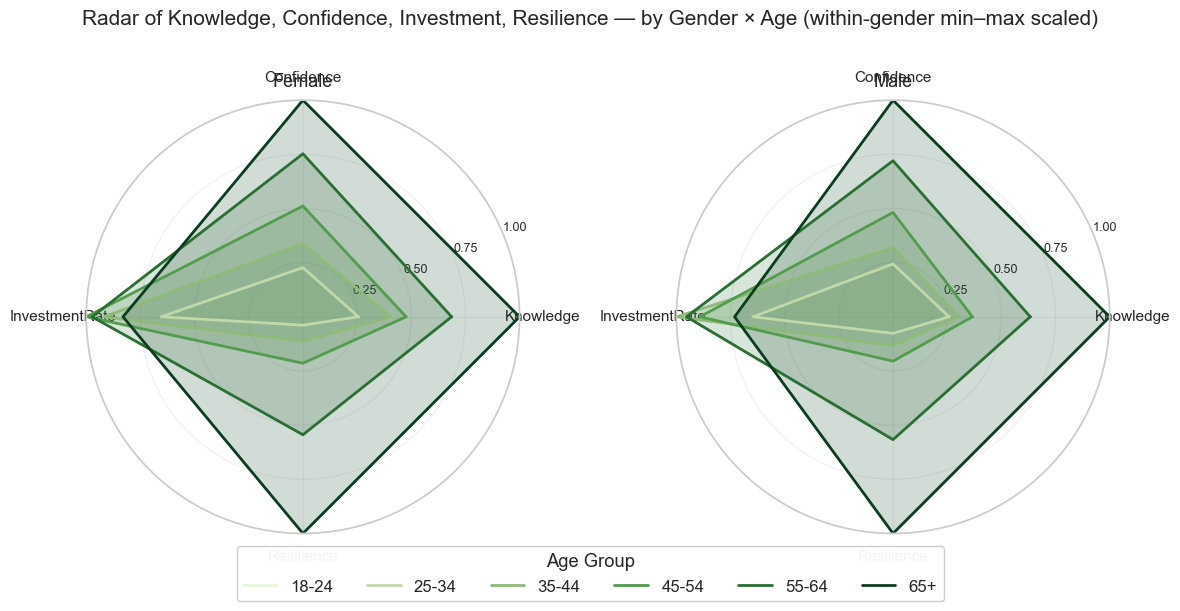

In [66]:
# --- Step 1: Normalize core fields (confidence 1–7, knowledge 1–7) ---
confidence_map = {
    "Strongly disagree": 1,
    "Moderately disagree": 2,
    "Slightly disagree": 3,
    "Neither agree nor disagree": 4,
    "Slightly agree": 5,
    "Moderately agree": 6,
    "Strongly agree": 7
}
df.loc[:, "Financial Confidence (num)"] = df["Financial Confidence"].map(confidence_map)
df.loc[:, "Financial Knowledge (num)"]  = pd.to_numeric(df["Financial Knowledge"], errors="coerce")

# --- Step 2: Robust binary mapping (Yes/No → 1/0) ---
bin_map = {"Yes": 1, "No": 0, "Y": 1, "N": 0, 1: 1, 0: 0}
for col in ["Emergency Funds", "Overdraw", "Other Investments", "Other Retirement Accounts"]:
    df.loc[:, f"{col} (bin)"] = df[col].map(bin_map).astype("float")  # unknowns -> NaN

# --- Step 3: Build per-row behavior metrics and keep needed columns ---
age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
metrics_df = (
    df[[
        "Gender", "Age Group",
        "Financial Knowledge (num)", "Financial Confidence (num)",
        "Other Investments (bin)", "Other Retirement Accounts (bin)",
        "Emergency Funds (bin)", "Overdraw (bin)"
    ]]
    .dropna(subset=["Gender", "Age Group", "Financial Knowledge (num)", "Financial Confidence (num)"])
    .copy()
)

# Investment rate = mean of (has other investments, has other retirement accounts)
metrics_df.loc[:, "InvestmentRate"] = metrics_df[["Other Investments (bin)", "Other Retirement Accounts (bin)"]].mean(axis=1)

# Resilience = has emergency fund AND not overdrawing (treat missing overdraft as no penalty)
metrics_df.loc[:, "Resilience"] = metrics_df["Emergency Funds (bin)"] * (1 - metrics_df["Overdraw (bin)"]).fillna(1.0)

# --- Step 4: Aggregate metrics by Gender × Age Group ---
grouped = (
    metrics_df
    .groupby(["Gender", "Age Group"], observed=False)
    .agg({
        "Financial Knowledge (num)": "mean",
        "Financial Confidence (num)": "mean",
        "InvestmentRate": "mean",
        "Resilience": "mean"
    })
    .reset_index()
)

# Order age groups and sort
grouped.loc[:, "Age Group"] = pd.Categorical(grouped["Age Group"], categories=age_order, ordered=True)
grouped = grouped.sort_values(["Gender", "Age Group"])

# --- Step 5: Min–max scale within each Gender to enhance within-gender contrasts ---
radar_cols_raw = [
    "Financial Knowledge (num)",
    "Financial Confidence (num)",
    "InvestmentRate",
    "Resilience",
]
radar_labels = ["Knowledge", "Confidence", "InvestmentRate", "Resilience"]

for col in radar_cols_raw:
    col_scaled = f"{col}__scaled"
    grouped.loc[:, col_scaled] = (
        grouped.groupby("Gender")[col]
               .transform(lambda s: (s - s.min()) / (s.max() - s.min())
                                   if (s.max() - s.min()) != 0 else 0.5)
               .clip(0, 1)
    )

radar_cols_scaled = [c + "__scaled" for c in radar_cols_raw]

# --- Step 6: Helper for radar angles ---
import numpy as np

def radar_angles(n_vars: int):
    theta = np.linspace(0, 2*np.pi, n_vars, endpoint=False)
    return np.concatenate([theta, [theta[0]]])  # close the polygon

angles = radar_angles(len(radar_cols_scaled))

# --- Step 7: Plot radar (facet by Gender, overlay Age groups; legend below; Set2 palette) ---
genders = grouped["Gender"].dropna().unique().tolist()
fig, axes = plt.subplots(1, len(genders), subplot_kw={"projection": "polar"}, figsize=(6*len(genders), 6))
if len(genders) == 1:
    axes = [axes]

leafy_green_cmap = LinearSegmentedColormap.from_list(
    "leafy_green_garden",
    ["#E9F5DB", "#A4C686", "#3D9140", "#0A3D1E"]
)
palette = [leafy_green_cmap(i / (len(age_order) - 1)) for i in range(len(age_order))]


for ax, g in zip(axes, genders):
    sub = grouped[grouped["Gender"] == g]
    for i, ag in enumerate(age_order):
        row = sub[sub["Age Group"] == ag]
        if row.empty:
            continue
        values = row[radar_cols_scaled].iloc[0].values
        values = np.concatenate([values, [values[0]]])  # close
        ax.plot(angles, values, color=palette[i], linewidth=2, label=ag)
        ax.fill(angles, values, color=palette[i], alpha=0.18)

    ax.set_title(g, fontsize=13, pad=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_labels, fontsize=11)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(["0.25", "0.50", "0.75", "1.00"], fontsize=9)
    ax.set_ylim(0, 1)
    ax.grid(alpha=0.25)

fig.suptitle(
    "Radar of Knowledge, Confidence, Investment, Resilience — by Gender × Age (within-gender min–max scaled)",
    fontsize=15, y=0.98
)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Age Group", loc="lower center",
           ncol=len(age_order), bbox_to_anchor=(0.5, -0.02),
           frameon=True, framealpha=0.95)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # reserve space for title + bottom legend
plt.show()


S3-Q1:(Geographic Overview)Which states have the highest and lowest levels of financial knowledge?

In [67]:
# --- Step 1: Normalize Financial Knowledge and clean data ---
df["Financial Knowledge (num)"] = pd.to_numeric(df["Financial Knowledge"], errors="coerce")
geo_df = df[["State", "Financial Knowledge (num)"]].dropna().copy()

# --- Step 2: Compute average financial knowledge per state ---
state_avg = (
    geo_df.groupby("State", observed=False)["Financial Knowledge (num)"]
          .mean()
          .reset_index()
          .rename(columns={"Financial Knowledge (num)": "Avg Knowledge"})
)

# --- Step 3: Map full state names → USPS codes ---
state_to_abbrev = {
    "Alabama":"AL","Alaska":"AK","Arizona":"AZ","Arkansas":"AR","California":"CA",
    "Colorado":"CO","Connecticut":"CT","Delaware":"DE","District of Columbia":"DC",
    "Florida":"FL","Georgia":"GA","Hawaii":"HI","Idaho":"ID","Illinois":"IL",
    "Indiana":"IN","Iowa":"IA","Kansas":"KS","Kentucky":"KY","Louisiana":"LA",
    "Maine":"ME","Maryland":"MD","Massachusetts":"MA","Michigan":"MI","Minnesota":"MN",
    "Mississippi":"MS","Missouri":"MO","Montana":"MT","Nebraska":"NE","Nevada":"NV",
    "New Hampshire":"NH","New Jersey":"NJ","New Mexico":"NM","New York":"NY",
    "North Carolina":"NC","North Dakota":"ND","Ohio":"OH","Oklahoma":"OK","Oregon":"OR",
    "Pennsylvania":"PA","Rhode Island":"RI","South Carolina":"SC","South Dakota":"SD",
    "Tennessee":"TN","Texas":"TX","Utah":"UT","Vermont":"VT","Virginia":"VA",
    "Washington":"WA","West Virginia":"WV","Wisconsin":"WI","Wyoming":"WY"
}
state_avg["state_code"] = state_avg["State"].map(state_to_abbrev)
state_avg = state_avg.dropna(subset=["state_code"])

# --- Step 4: Draw choropleth (Summer Sunset gradient) ---
fig = px.choropleth(
    state_avg,
    locations="state_code",
    locationmode="USA-states",
    color="Avg Knowledge",
    color_continuous_scale=["#F26B38", "#F7C99E", "#0067A3"],  # Orange → Sand → Blue
    range_color=(state_avg["Avg Knowledge"].min(), state_avg["Avg Knowledge"].max()),
    scope="usa",
    hover_name="State",
    hover_data={"state_code": False, "Avg Knowledge":":.2f"},
    labels={"Avg Knowledge": "Avg Financial Knowledge (1–7)"},
    title="Average Financial Knowledge by State (All Waves Combined)"
)

# --- Step 5: Customize color bar & layout ---
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Avg Knowledge (1–7)",
        titlefont=dict(size=12),
        tickfont=dict(size=10)
    ),
    geo=dict(
        bgcolor="rgba(0,0,0,0)",  # transparent background
        lakecolor="white"
    )
)

fig.show()


# --- Step 5 (optional): Top & bottom 10 states ---
tb = pd.concat([
    state_avg.nlargest(10, "Avg Knowledge").assign(Rank="Top 10"),
    state_avg.nsmallest(10, "Avg Knowledge").assign(Rank="Bottom 10")
])
display(tb[["Rank","State","Avg Knowledge"]].round(2))

,Rank,State,Avg Knowledge
7,Top 10,Delaware,5.18
9,Top 10,Florida,5.15
40,Top 10,South Carolina,5.14
8,Top 10,District of Columbia,5.13
10,Top 10,Georgia,5.11
39,Top 10,Rhode Island,5.10
46,Top 10,Virginia,5.10
6,Top 10,Connecticut,5.09
32,Top 10,New York,5.08
18,Top 10,Louisiana,5.08


S3-Q2:(Extreme Comparison)Which states show the largest gap between “very high” and “very low” financial knowledge groups?

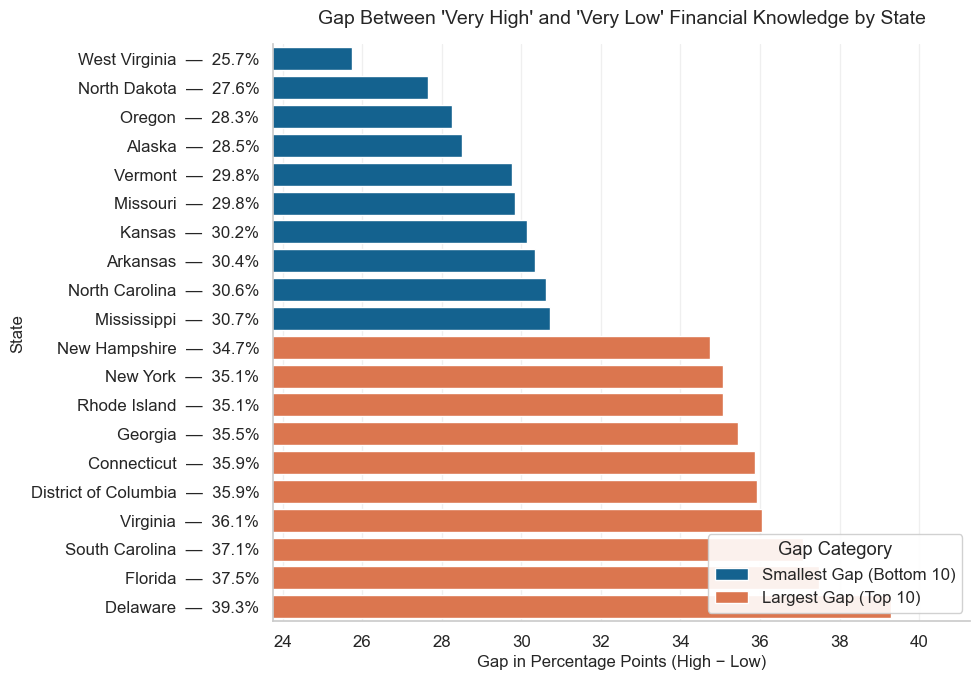

,Category,State,High Knowledge (6–7) %,Low Knowledge (1–2) %,Gap (%)
48,Smallest Gap (Bottom 10),West Virginia,31.21,5.46,25.75
34,Smallest Gap (Bottom 10),North Dakota,32.86,5.21,27.64
37,Smallest Gap (Bottom 10),Oregon,33.42,5.16,28.26
1,Smallest Gap (Bottom 10),Alaska,33.38,4.87,28.51
45,Smallest Gap (Bottom 10),Vermont,34.60,4.82,29.77
25,Smallest Gap (Bottom 10),Missouri,34.68,4.83,29.85
16,Smallest Gap (Bottom 10),Kansas,35.15,4.99,30.15
3,Smallest Gap (Bottom 10),Arkansas,35.65,5.30,30.35
33,Smallest Gap (Bottom 10),North Carolina,35.18,4.57,30.61
24,Smallest Gap (Bottom 10),Mississippi,36.84,6.11,30.73


In [68]:
# --- Step 1: Load dataset ---
df = pd.read_csv("Combined_09_12_24.csv")

# Convert Financial Knowledge to numeric
df["Financial Knowledge (num)"] = pd.to_numeric(df["Financial Knowledge"], errors="coerce")

# Drop missing values
df = df.dropna(subset=["State", "Financial Knowledge (num)"]).copy()

# --- Step 2: Define “very high” (6–7) and “very low” (1–2) groups ---
df["High_Knowledge"] = (df["Financial Knowledge (num)"] >= 6).astype(int)
df["Low_Knowledge"] = (df["Financial Knowledge (num)"] <= 2).astype(int)

# --- Step 3: Compute share of each group by state ---
state_summary = (
    df.groupby("State", observed=False)[["High_Knowledge", "Low_Knowledge"]]
      .mean()
      .reset_index()
)

state_summary["High (%)"] = state_summary["High_Knowledge"] * 100
state_summary["Low (%)"]  = state_summary["Low_Knowledge"] * 100
state_summary["Gap (%)"]  = state_summary["High (%)"] - state_summary["Low (%)"]

# --- Step 4: Select top & bottom 10 states by gap ---
top10 = state_summary.nlargest(10, "Gap (%)")
bottom10 = state_summary.nsmallest(10, "Gap (%)")

# --- Step 5: Combine and create a display label (State + % value) ---
combined = pd.concat([
    top10.assign(Category="Largest Gap (Top 10)"),
    bottom10.assign(Category="Smallest Gap (Bottom 10)")
])

combined["State Label"] = (
    combined["State"] + "  —  " + combined["Gap (%)"].round(1).astype(str) + "%"
)

# Ensure states appear in ascending order of gap for readability
plot_df = combined.sort_values("Gap (%)")
y_order = plot_df["State Label"].tolist()

# --- Step 6: Plot horizontal bar chart ---
plt.figure(figsize=(10, 7))
sns.barplot(
    data=plot_df,
    y="State Label",
    x="Gap (%)",
    hue="Category",
    order=y_order,
    palette={
        "Largest Gap (Top 10)": "#F26B38",
        "Smallest Gap (Bottom 10)": "#0067A3"
    }
)

# --- Step 7: Style adjustments ---
plt.title(
    "Gap Between 'Very High' and 'Very Low' Financial Knowledge by State",
    fontsize=14, pad=15
)
plt.xlabel("Gap in Percentage Points (High − Low)", fontsize=12)
plt.ylabel("State", fontsize=12)

# Adjust x-axis range to add breathing space
xmin = state_summary["Gap (%)"].min() - 2
xmax = state_summary["Gap (%)"].max() + 2
plt.xlim(xmin, xmax)

# Add a vertical reference line at 0
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(axis="x", alpha=0.3)
sns.despine()

# Legend at bottom-right, clean white box
plt.legend(
    title="Gap Category",
    loc="lower right",
    frameon=True,
    facecolor="white",
    framealpha=0.9
)

plt.tight_layout()
plt.show()

# --- Step 8: Optional summary table for report use ---
display(
    plot_df[["Category", "State", "High (%)", "Low (%)", "Gap (%)"]]
      .round(2)
      .rename(columns={
          "High (%)": "High Knowledge (6–7) %",
          "Low (%)": "Low Knowledge (1–2) %",
          "Gap (%)": "Gap (%)"
      })
)

S3-Q3:(Temporal Evolution)How has financial knowledge changed across regions over time

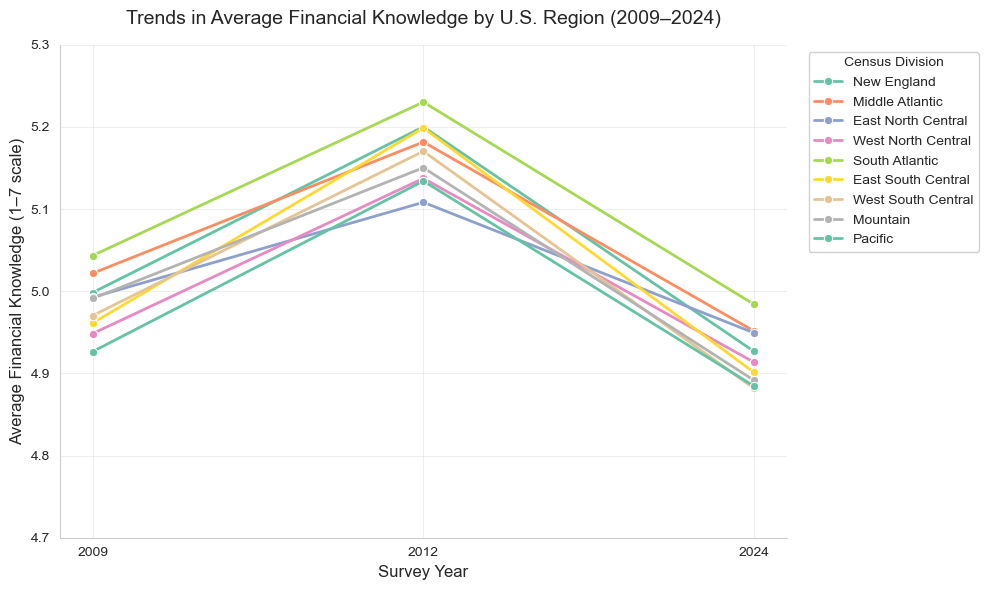

In [14]:
# --- Step 1: Load each dataset and tag with year ---
df09 = pd.read_csv("Cleaned 2009.csv")
df12 = pd.read_csv("Cleaned 2012.csv")
df24 = pd.read_csv("Cleaned 2024.csv")

df09["Year"] = "2009"
df12["Year"] = "2012"
df24["Year"] = "2024"

# Combine
df_all = pd.concat([df09, df12, df24], ignore_index=True)

# --- Step 2: Clean and normalize ---
df_all["Financial Knowledge (num)"] = pd.to_numeric(df_all["Financial Knowledge"], errors="coerce")
df_all = df_all.dropna(subset=["State", "Financial Knowledge (num)"])

# --- Step 3: Add Census Division ---
division_map = {
    "Maine":"New England","New Hampshire":"New England","Vermont":"New England",
    "Massachusetts":"New England","Rhode Island":"New England","Connecticut":"New England",
    "New York":"Middle Atlantic","New Jersey":"Middle Atlantic","Pennsylvania":"Middle Atlantic",
    "Ohio":"East North Central","Indiana":"East North Central","Illinois":"East North Central",
    "Michigan":"East North Central","Wisconsin":"East North Central",
    "Minnesota":"West North Central","Iowa":"West North Central","Missouri":"West North Central",
    "North Dakota":"West North Central","South Dakota":"West North Central","Nebraska":"West North Central","Kansas":"West North Central",
    "Delaware":"South Atlantic","Maryland":"South Atlantic","District of Columbia":"South Atlantic","Virginia":"South Atlantic","West Virginia":"South Atlantic",
    "North Carolina":"South Atlantic","South Carolina":"South Atlantic","Georgia":"South Atlantic","Florida":"South Atlantic",
    "Kentucky":"East South Central","Tennessee":"East South Central","Alabama":"East South Central","Mississippi":"East South Central",
    "Arkansas":"West South Central","Louisiana":"West South Central","Oklahoma":"West South Central","Texas":"West South Central",
    "Montana":"Mountain","Idaho":"Mountain","Wyoming":"Mountain","Nevada":"Mountain","Utah":"Mountain","Colorado":"Mountain","Arizona":"Mountain","New Mexico":"Mountain",
    "Alaska":"Pacific","Washington":"Pacific","Oregon":"Pacific","California":"Pacific","Hawaii":"Pacific"
}

df_all["Census Division"] = df_all["State"].map(division_map)
df_all = df_all.dropna(subset=["Census Division"])

# --- Step 4: Compute average per region per year ---
region_trend = (
    df_all.groupby(["Census Division", "Year"], observed=False)["Financial Knowledge (num)"]
    .mean()
    .reset_index()
    .rename(columns={"Financial Knowledge (num)": "Avg Knowledge"})
)

# --- Step 5: Order for visual clarity ---
division_order = [
    "New England","Middle Atlantic",
    "East North Central","West North Central",
    "South Atlantic","East South Central","West South Central",
    "Mountain","Pacific"
]
region_trend["Census Division"] = pd.Categorical(region_trend["Census Division"], categories=division_order, ordered=True)

# --- Step 6: Treat Year as a CATEGORICAL variable ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=region_trend,
    x="Year",
    y="Avg Knowledge",
    hue="Census Division",
    marker="o",
    linewidth=2,
    palette="Set2"
)

# --- Step 7: Styling ---
plt.title("Trends in Average Financial Knowledge by U.S. Region (2009–2024)", fontsize=14, pad=15)
plt.xlabel("Survey Year", fontsize=12)
plt.ylabel("Average Financial Knowledge (1–7 scale)", fontsize=12)
plt.ylim(4.7, 5.3)
plt.grid(alpha=0.3)
sns.despine()

plt.legend(
    title="Census Division",
    bbox_to_anchor=(1.02, 1.0),
    loc="upper left",
    frameon=True,
    facecolor="white",
    framealpha=0.9
)

plt.tight_layout()
plt.show()

S3-Q4:(Confidence vs. Reality)Do regions with higher financial confidence also demonstrate higher actual knowledge?

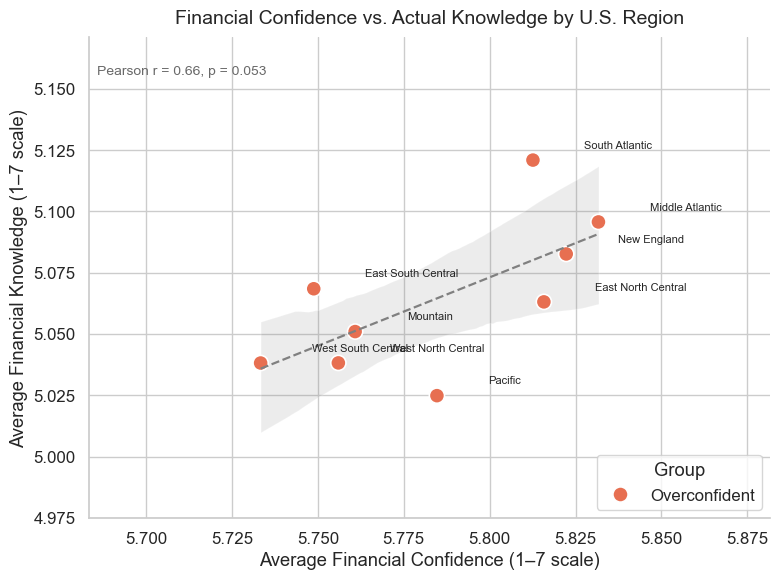

,Census Division,Avg Confidence,Avg Knowledge,Confidence − Knowledge,Group
5,Pacific,5.785,5.025,0.760,Overconfident
0,East North Central,5.816,5.063,0.753,Overconfident
4,New England,5.822,5.083,0.740,Overconfident
2,Middle Atlantic,5.832,5.096,0.736,Overconfident
7,West North Central,5.756,5.038,0.718,Overconfident
3,Mountain,5.761,5.051,0.710,Overconfident
8,West South Central,5.733,5.038,0.695,Overconfident
6,South Atlantic,5.813,5.121,0.692,Overconfident
1,East South Central,5.749,5.068,0.680,Overconfident


In [15]:
# --- Step 1: Clean and normalize columns ---
# Keep only needed columns
d = df[["Census Division", "Financial Confidence", "Financial Knowledge"]].copy()

# Map Likert confidence → numeric (1–7)
confidence_map = {
    "Strongly disagree": 1, "Moderately disagree": 2, "Slightly disagree": 3,
    "Neither agree nor disagree": 4, "Slightly agree": 5,
    "Moderately agree": 6, "Strongly agree": 7
}
d["Financial Confidence (num)"] = (
    d["Financial Confidence"].replace(confidence_map).pipe(pd.to_numeric, errors="coerce")
)
d["Financial Knowledge (num)"] = pd.to_numeric(d["Financial Knowledge"], errors="coerce")

# Drop missing/invalid rows
d = d.dropna(subset=["Census Division", "Financial Confidence (num)", "Financial Knowledge (num)"])
d = d[
    d["Financial Confidence (num)"].between(1, 7) &
    d["Financial Knowledge (num)"].between(1, 7)
]

# --- Step 2: Compute regional averages (Confidence & Knowledge) ---
region_summary = (
    d.groupby("Census Division", as_index=False)[["Financial Confidence (num)", "Financial Knowledge (num)"]]
     .mean()
     .rename(columns={
         "Financial Confidence (num)": "Avg Confidence",
         "Financial Knowledge (num)": "Avg Knowledge"
     })
)

# --- Step 3: Add gap, classify regions, and compute correlation ---
region_summary["Gap"] = region_summary["Avg Confidence"] - region_summary["Avg Knowledge"]

# Classification thresholds: tweak if you want tighter/looser bands
region_summary["Group"] = region_summary["Gap"].apply(
    lambda g: "Overconfident" if g > 0.05 else ("Underconfident" if g < -0.05 else "Aligned")
)

from scipy.stats import pearsonr
r, p = pearsonr(region_summary["Avg Confidence"], region_summary["Avg Knowledge"])
corr_text = f"Pearson r = {r:.2f}, p = {p:.3f}"

# --- Step 4: Build scatter with regression line and 45° reference ---
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)
palette = {"Overconfident": "#E76F51", "Underconfident": "#2A9D8F", "Aligned": "#264653"}

# Dynamic axis limits with small padding
xmin, xmax = region_summary["Avg Confidence"].min(), region_summary["Avg Confidence"].max()
ymin, ymax = region_summary["Avg Knowledge"].min(),  region_summary["Avg Knowledge"].max()
xpad = max(0.05, (xmax - xmin) * 0.15)
ypad = max(0.05, (ymax - ymin) * 0.15)

fig, ax = plt.subplots(figsize=(8, 6))

# Regression (gray dashed)
sns.regplot(
    data=region_summary, x="Avg Confidence", y="Avg Knowledge",
    scatter=False, line_kws={"color": "gray", "lw": 1.6, "ls": "--"}, ax=ax
)

# Points colored by group
sns.scatterplot(
    data=region_summary, x="Avg Confidence", y="Avg Knowledge",
    hue="Group", palette=palette, s=120, edgecolor="white", linewidth=1.2, ax=ax
)

# Region labels (slight offset to reduce overlap)
for _, r_ in region_summary.iterrows():
    ax.text(r_["Avg Confidence"] + 0.015, r_["Avg Knowledge"] + 0.006,
            r_["Census Division"], fontsize=8, va="center", ha="left")

# 45° line: “perfect alignment” (confidence == knowledge)
lo = min(xmin - xpad, ymin - ypad)
hi = max(xmax + xpad, ymax + ypad)
ax.plot([lo, hi], [lo, hi], color="gray", ls=":", lw=1.2, alpha=0.9)

# --- Step 5: Style, labels, legend, and annotation ---
ax.set_title("Financial Confidence vs. Actual Knowledge by U.S. Region", fontsize=14, pad=10)
ax.set_xlabel("Average Financial Confidence (1–7 scale)")
ax.set_ylabel("Average Financial Knowledge (1–7 scale)")
ax.set_xlim(xmin - xpad, xmax + xpad)
ax.set_ylim(ymin - ypad, ymax + ypad)
ax.text(xmin - xpad * 0.95, ymax + ypad * 0.7, corr_text, fontsize=10, color="dimgray")

# Legend inside the plot so layout stays compact
ax.legend(title="Group", loc="lower right", frameon=True)
sns.despine()
plt.tight_layout()
plt.show()

# --- Step 6 (Optional): Show a ranked table by gap (Over → Under) ---
display(
    region_summary.sort_values("Gap", ascending=False)
                  .rename(columns={"Gap": "Confidence − Knowledge"})
                  .round(3)
)


S3-Q5:(Comprehensive Regional Profile)Which regions demonstrate the strongest overall financial health—combining confidence, knowledge, savings, credit, and emergency preparedness?

/var/folders/jz/k_vbt06j575b45vdglnjz_680000gn/T/ipykernel_66749/2950077497.py:81: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




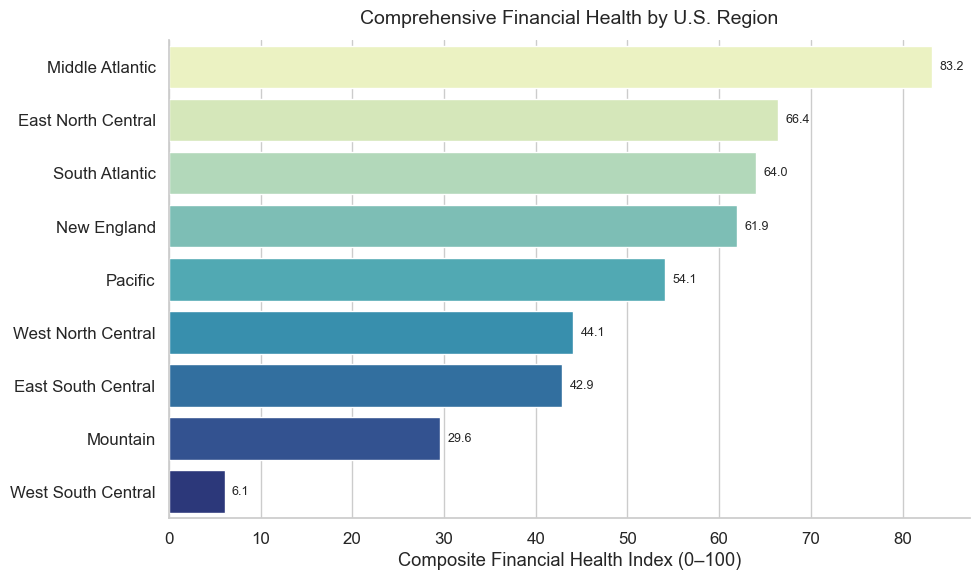

,Census Division,Confidence,Knowledge,Savings,Credit,Emergency,Composite Score
2,Middle Atlantic,6.00,5.23,0.86,0.68,0.59,83.23
0,East North Central,6.00,5.23,0.86,0.65,0.53,66.40
6,South Atlantic,5.98,5.28,0.86,0.63,0.53,64.03
4,New England,5.99,5.22,0.88,0.64,0.53,61.94
5,Pacific,5.96,5.17,0.90,0.65,0.55,54.13
7,West North Central,5.95,5.20,0.86,0.65,0.51,44.08
1,East South Central,5.98,5.27,0.81,0.62,0.49,42.88
3,Mountain,5.93,5.20,0.87,0.61,0.49,29.58
8,West South Central,5.91,5.20,0.80,0.59,0.49,6.07


In [16]:
# --- Step 1: Prepare & clean columns ---
cols = [
    "Census Division",
    "Financial Confidence",
    "Financial Knowledge",
    "Savings Account",
    "Overdraw",
    "Credit Card Balance Interest",
    "Emergency Funds",
]
d = df[cols].copy()

# Likert (confidence) → numeric 1–7
likert_map = {
    "Strongly disagree": 1, "Moderately disagree": 2, "Slightly disagree": 3,
    "Neither agree nor disagree": 4, "Slightly agree": 5,
    "Moderately agree": 6, "Strongly agree": 7
}
d["Financial Confidence (num)"] = d["Financial Confidence"].replace(likert_map)
d["Financial Confidence (num)"] = pd.to_numeric(d["Financial Confidence (num)"], errors="coerce")

# Knowledge → numeric (1–7)
d["Financial Knowledge (num)"] = pd.to_numeric(d["Financial Knowledge"], errors="coerce")

# Helper: binarize Yes/No safely (others → NaN)
def binarize_yes_no(s: pd.Series) -> pd.Series:
    yn_map = {"Yes": 1, "No": 0, "Y": 1, "N": 0}
    s = s.astype(str).str.strip()
    s = s.replace(yn_map)
    return pd.to_numeric(s, errors="coerce")  # non-Yes/No (e.g., 'Prefer not to say') → NaN

d["Savings Account (bin)"] = binarize_yes_no(d["Savings Account"])
d["Overdraw (bin)"] = binarize_yes_no(d["Overdraw"])
d["Credit Card Balance Interest (bin)"] = binarize_yes_no(d["Credit Card Balance Interest"])
d["Emergency Funds (bin)"] = binarize_yes_no(d["Emergency Funds"])

# Drop rows missing any required component or division
needed = [
    "Census Division", "Financial Confidence (num)", "Financial Knowledge (num)",
    "Savings Account (bin)", "Overdraw (bin)", "Credit Card Balance Interest (bin)", "Emergency Funds (bin)"
]
d = d.dropna(subset=needed)

# --- Step 2: Build component scores ---
# Savings score: has a savings account (1 good)
d["Savings (score)"] = d["Savings Account (bin)"].astype(float)

# Credit score: good = NOT overdrawing AND NOT paying revolving interest
d["Credit (score)"] = (
    (1 - d["Overdraw (bin)"].astype(float)) + (1 - d["Credit Card Balance Interest (bin)"].astype(float))
) / 2.0

# Emergency preparedness score
d["Emergency (score)"] = d["Emergency Funds (bin)"].astype(float)

# --- Step 3: Aggregate by region, normalize each component (0–1), build composite (0–100) ---
region_means = (
    d.groupby("Census Division", as_index=False)[[
        "Financial Confidence (num)", "Financial Knowledge (num)",
        "Savings (score)", "Credit (score)", "Emergency (score)"
    ]].mean()
)

from sklearn.preprocessing import MinMaxScaler
to_scale = [
    "Financial Confidence (num)", "Financial Knowledge (num)",
    "Savings (score)", "Credit (score)", "Emergency (score)"
]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(region_means[to_scale])
scaled_df = pd.DataFrame(scaled, columns=[c + " (scaled)" for c in to_scale])

region_health = pd.concat([region_means[["Census Division"]], scaled_df], axis=1)
region_health["Composite Score"] = scaled_df.mean(axis=1) * 100
region_health = region_health.sort_values("Composite Score", ascending=False)

# --- Step 4: Visualize ranking (horizontal bar chart) ---
sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=region_health,
    y="Census Division", x="Composite Score",
    palette="YlGnBu", ax=ax
)

# Annotate bars
for i, v in enumerate(region_health["Composite Score"]):
    ax.text(v + 0.8, i, f"{v:.1f}", va="center", fontsize=9)

# --- Step 5: Titles & labels ---
ax.set_title("Comprehensive Financial Health by U.S. Region", fontsize=14, pad=12)
ax.set_xlabel("Composite Financial Health Index (0–100)")
ax.set_ylabel("")
sns.despine()
plt.tight_layout()
plt.show()

# --- Optional: tidy table with raw means + composite ---
pretty = (
    region_means
      .merge(region_health[["Census Division", "Composite Score"]], on="Census Division")
      .rename(columns={
          "Financial Confidence (num)": "Confidence",
          "Financial Knowledge (num)": "Knowledge",
          "Savings (score)": "Savings",
          "Credit (score)": "Credit",
          "Emergency (score)": "Emergency"
      })
      .sort_values("Composite Score", ascending=False)
      .round(2)
)
display(pretty)